<span style="color:orange">
    
# Chemical Gas Classification Predictor using Machine Learning

# About Dataset

This dataset has been preprocessed from the original dataset collected from a chemical detection platform in a wind tunnel facility. The original dataset comprises 18,000 time-series recordings from six different locations within the wind tunnel. The recordings were made in response to ten high-priority chemical gaseous substances, resulting in a ten-class gas discrimination problem.

Please visit the [Gas Sensor Arrays in Open Sampling Settings](https://archive.ics.uci.edu/dataset/251/gas+sensor+arrays+in+open+sampling+settings) dataset page on the UCI Machine Learning Repository for more information.

### Data Collection Details

- **Time Period:** December 2010 to April 2012 (16 months)
- **Location:** Wind tunnel research test-bed facility at the BioCircuits Institute, University of California San Diego

### Dataset Composition

- **Number of Attributes (Features):**
  - Each measurement includes 72 time-series recorded over 260 seconds.
  - Data was collected at a sample rate of 100 Hz (samples per second).

- **Total Time Series:**
  - The dataset includes 75 time-series, totaling 26,000 points.

### Additional Information
- The dataset also includes time, temperature, and relative humidity information, providing context for the chemical detection measurements.

**This dataset has been prepared for a ten-class gas discrimination problem, making it suitable for classification tasks in machine learning.**


## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import opendatasets as od

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Customisation of graph

In [2]:
# For customisation of graph
sns.set_style('darkgrid')

## Data Preparation 

In [3]:
od.download('https://www.kaggle.com/datasets/brmil07/gas-classification-dataset/data')

Skipping, found downloaded files in ".\gas-classification-dataset" (use force=True to force download)


In [4]:
os.listdir('gas-classification-dataset')

['chemicals_in_wind_tunnel.csv', 'chemicals_wind_tunnel_3.csv']

## Exploratory Data Analysis

In [5]:
df = pd.read_csv('gas-classification-dataset/chemicals_in_wind_tunnel.csv', index_col=0)

In [6]:
df.shape

(17921, 289)

In [7]:
df.head()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical
0,0.110274,0.100774,0.177316,0.081529,0.225642,0.254600,0.250679,0.239913,0.070038,0.088185,...,0.213135,0.074219,0.071777,0.115723,0.097656,0.201172,0.178223,0.232178,0.253662,Acetaldehyde_500
1,0.114903,0.117785,0.187970,0.097983,0.213534,0.242186,0.238034,0.228992,0.075349,0.104410,...,0.200684,0.079346,0.084229,0.125000,0.107178,0.195557,0.172119,0.225098,0.246826,Acetaldehyde_500
2,0.118138,0.128888,0.195197,0.110886,0.204072,0.232273,0.229351,0.221341,0.082085,0.122991,...,0.194580,0.084717,0.100098,0.135010,0.132080,0.181396,0.159180,0.210938,0.231445,Acetaldehyde_500
3,0.123282,0.143118,0.204956,0.127255,0.196539,0.224175,0.220981,0.213877,0.089352,0.139451,...,0.186768,0.088623,0.109375,0.140869,0.148682,0.166992,0.146729,0.197021,0.215576,Acetaldehyde_500
4,0.130403,0.159920,0.216208,0.146859,0.188552,0.215028,0.211930,0.205568,0.098506,0.157591,...,0.176270,0.091553,0.117676,0.145752,0.161865,0.157227,0.138184,0.185791,0.203369,Acetaldehyde_500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17921 entries, 0 to 17920
Columns: 289 entries, mean_A1 to Chemical
dtypes: float64(288), object(1)
memory usage: 39.7+ MB


In [9]:
df.describe()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H7,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8
count,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,...,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000
mean,0.113816,0.125939,0.188913,0.104609,0.196204,0.222991,0.216332,0.208546,0.076995,0.120509,...,0.192296,0.185549,0.081673,0.097353,0.130306,0.135430,0.173226,0.150823,0.202596,0.222015
std,0.015489,0.027048,0.021832,0.037621,0.018407,0.019773,0.023462,0.021739,0.010679,0.023314,...,0.020706,0.021684,0.010145,0.018497,0.015155,0.046745,0.019832,0.017740,0.021411,0.022932
min,0.077624,0.066902,0.135246,0.030522,0.137013,0.152955,0.132964,0.129567,0.049982,0.069073,...,0.131592,0.121094,0.058350,0.055420,0.093018,0.056641,0.127930,0.110352,0.152832,0.166748
25%,0.103377,0.105660,0.173425,0.079346,0.183695,0.209859,0.202844,0.196144,0.068934,0.102492,...,0.178223,0.171143,0.075684,0.084473,0.120850,0.106689,0.158447,0.137695,0.186523,0.204590
50%,0.112461,0.124970,0.187662,0.101362,0.195725,0.222803,0.216507,0.208827,0.076428,0.120534,...,0.192139,0.185303,0.081055,0.097656,0.130127,0.129150,0.171631,0.149170,0.201172,0.220703
75%,0.122558,0.143799,0.202221,0.123404,0.208651,0.236664,0.232265,0.222998,0.084786,0.138713,...,0.206299,0.200439,0.086426,0.109619,0.138672,0.152100,0.186279,0.162598,0.217041,0.237549
max,0.211024,0.310942,0.309874,0.597236,0.438342,0.469775,0.472173,0.460584,0.128835,0.179745,...,0.443848,0.433838,0.156006,0.201904,0.229004,0.658691,0.404541,0.373291,0.445312,0.466309


In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
# Check for missing values
df.isnull().sum()

mean_A1     0
mean_A2     0
mean_A3     0
mean_A4     0
mean_A5     0
           ..
max_I5      0
max_I6      0
max_I7      0
max_I8      0
Chemical    0
Length: 289, dtype: int64

In [12]:
df.nunique()

mean_A1     16114
mean_A2     16901
mean_A3     16687
mean_A4     17018
mean_A5     16451
            ...  
max_I5        527
max_I6        469
max_I7        559
max_I8        595
Chemical       11
Length: 289, dtype: int64

In [13]:
df['Chemical'].value_counts(ascending=True)

Chemical
CO_1000              450
Butanol_100         1500
CO_4000             1571
Acetaldehyde_500    1800
Acetone_2500        1800
Ammonia_10000       1800
Benzene_200         1800
Ethylene_500        1800
Methane_1000        1800
Methanol_200        1800
Toluene_200         1800
Name: count, dtype: int64

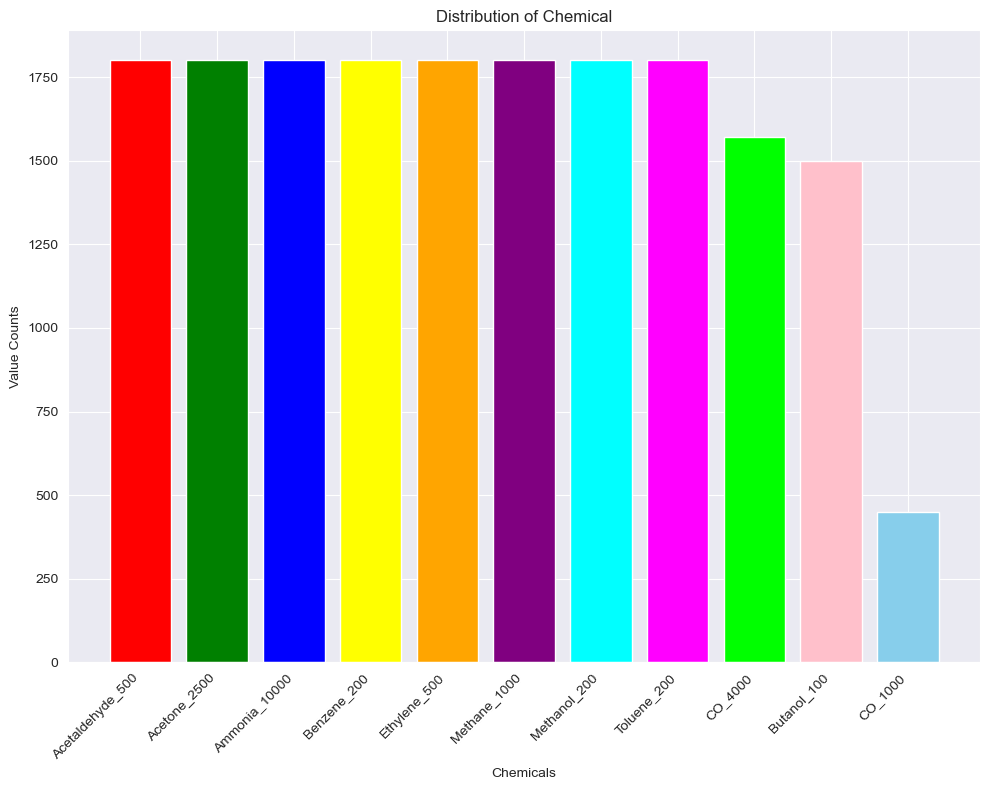

In [14]:
# Calculate the value counts
value_counts = df['Chemical'].value_counts()

# Define colors for each bar
colors = ['red', 'green', 'blue', 'yellow', 'orange',
          'purple', 'cyan', 'magenta', 'lime', 'pink', 'skyblue']

# Create a bar plot
plt.figure(figsize=(10,8))
plt.bar(value_counts.index, value_counts,color=colors)

# Adding labels and title
plt.xlabel('Chemicals')
plt.ylabel('Value Counts')
plt.title('Distribution of Chemical')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
           
# Show plot
plt.tight_layout()
plt.show()

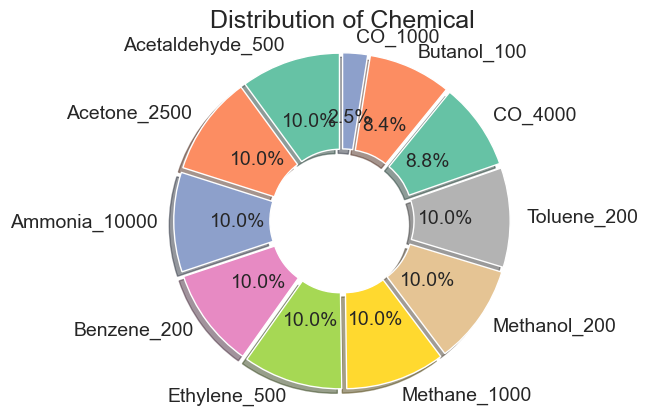

In [15]:
# Define different colors for each wedge
colors = ['steelblue', 'darkorange', 'forestgreen', 'firebrick', 'mediumpurple', 
          'sienna', 'orchid', 'dimgray', 'olive', 'deepskyblue', 'deeppink']

#Create a pie chart
colors = sns.color_palette("Set2")
plt.pie(value_counts,
        labels=value_counts.index, 
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90,
        explode=[0.05]*len(value_counts), 
        shadow=True, 
        wedgeprops=dict(width=0.6),
        textprops={'fontsize': 14})
plt.title("Distribution of Chemical", fontsize=18)
plt.axis('equal') 
plt.show()

In [16]:
# LabelEncoder is used to encode categorical integer features into numeric labels.

label = LabelEncoder()
data_df = df.copy()
data_df['Chemical_Encoded'] = label.fit_transform(data_df['Chemical'])
data_df

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical,Chemical_Encoded
0,0.110274,0.100774,0.177316,0.081529,0.225642,0.254600,0.250679,0.239913,0.070038,0.088185,...,0.074219,0.071777,0.115723,0.097656,0.201172,0.178223,0.232178,0.253662,Acetaldehyde_500,0
1,0.114903,0.117785,0.187970,0.097983,0.213534,0.242186,0.238034,0.228992,0.075349,0.104410,...,0.079346,0.084229,0.125000,0.107178,0.195557,0.172119,0.225098,0.246826,Acetaldehyde_500,0
2,0.118138,0.128888,0.195197,0.110886,0.204072,0.232273,0.229351,0.221341,0.082085,0.122991,...,0.084717,0.100098,0.135010,0.132080,0.181396,0.159180,0.210938,0.231445,Acetaldehyde_500,0
3,0.123282,0.143118,0.204956,0.127255,0.196539,0.224175,0.220981,0.213877,0.089352,0.139451,...,0.088623,0.109375,0.140869,0.148682,0.166992,0.146729,0.197021,0.215576,Acetaldehyde_500,0
4,0.130403,0.159920,0.216208,0.146859,0.188552,0.215028,0.211930,0.205568,0.098506,0.157591,...,0.091553,0.117676,0.145752,0.161865,0.157227,0.138184,0.185791,0.203369,Acetaldehyde_500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,0.090209,0.081975,0.152585,0.091519,0.197655,0.224110,0.221826,0.213248,0.059393,0.079737,...,0.075195,0.076660,0.117676,0.118408,0.185303,0.160889,0.217041,0.238281,Toluene_200,10
17917,0.096285,0.098654,0.164511,0.109453,0.197884,0.225689,0.212466,0.204733,0.065996,0.102331,...,0.078613,0.090820,0.125000,0.135986,0.176025,0.152588,0.204834,0.226318,Toluene_200,10
17918,0.100616,0.112874,0.174178,0.129559,0.185512,0.212349,0.199964,0.193657,0.071461,0.117418,...,0.080078,0.095947,0.127686,0.146729,0.170166,0.147461,0.200195,0.220703,Toluene_200,10
17919,0.106454,0.128040,0.185289,0.151214,0.175583,0.201057,0.188939,0.183624,0.077144,0.129645,...,0.084473,0.106445,0.134521,0.160645,0.162598,0.140869,0.189941,0.209961,Toluene_200,10


In [17]:
# Value counts for both original and encoded columns
value_counts_original = df['Chemical'].value_counts().reset_index()
value_counts_original.columns = ['Chemical','OG_value_count']

value_counts_encoded = data_df['Chemical_Encoded'].value_counts().reset_index()
value_counts_encoded.columns = ['Encoded_value','Encoded_value_count']

# Concatenate the actual and encoded data along with their value counts
concate_df = pd.concat([value_counts_original, value_counts_encoded],axis=1)
concate_df = concate_df.drop(columns=['OG_value_count','Encoded_value_count'])

print("Actual and Labeled Data:")
concate_df

Actual and Labeled Data:


,Chemical,Encoded_value
0,Acetaldehyde_500,0
1,Acetone_2500,1
2,Ammonia_10000,2
3,Benzene_200,3
4,Ethylene_500,7
5,Methane_1000,8
6,Methanol_200,9
7,Toluene_200,10
8,CO_4000,6
9,Butanol_100,4


## Dataset Preprocessing (Splitting of data to train and test)

In [18]:
# Column 'Chemical' is the target variable
X = df.drop(['Chemical'], axis=1)
y = df['Chemical']

# Fit and transform the target variable
y = label.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Random Forest Classifier)

In [19]:
# Initialize the Random Forest Classifier (ML Model)
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

## Feature Importance

In [1]:
# Get feature importances
importance_df = pd.DataFrame({
    'feature': X_train.columns, # feature names
    'importance': rf.feature_importances_ # feature importances
}).sort_values('importance', ascending=False) # Sort feature importances in descending order


NameError: name 'pd' is not defined

In [21]:
importance_df.head(10)

,feature,importance
107,std_E4,0.049365
251,max_E4,0.049141
35,mean_E4,0.038805
32,mean_E1,0.033810
176,min_E1,0.031634
248,max_E1,0.030195
115,std_F4,0.021496
111,std_E8,0.020884
99,std_D4,0.018864
27,mean_D4,0.016940


In [22]:
len(importance_df)

288

<Axes: title={'center': 'Feature Importance'}, xlabel='feature', ylabel='importance'>

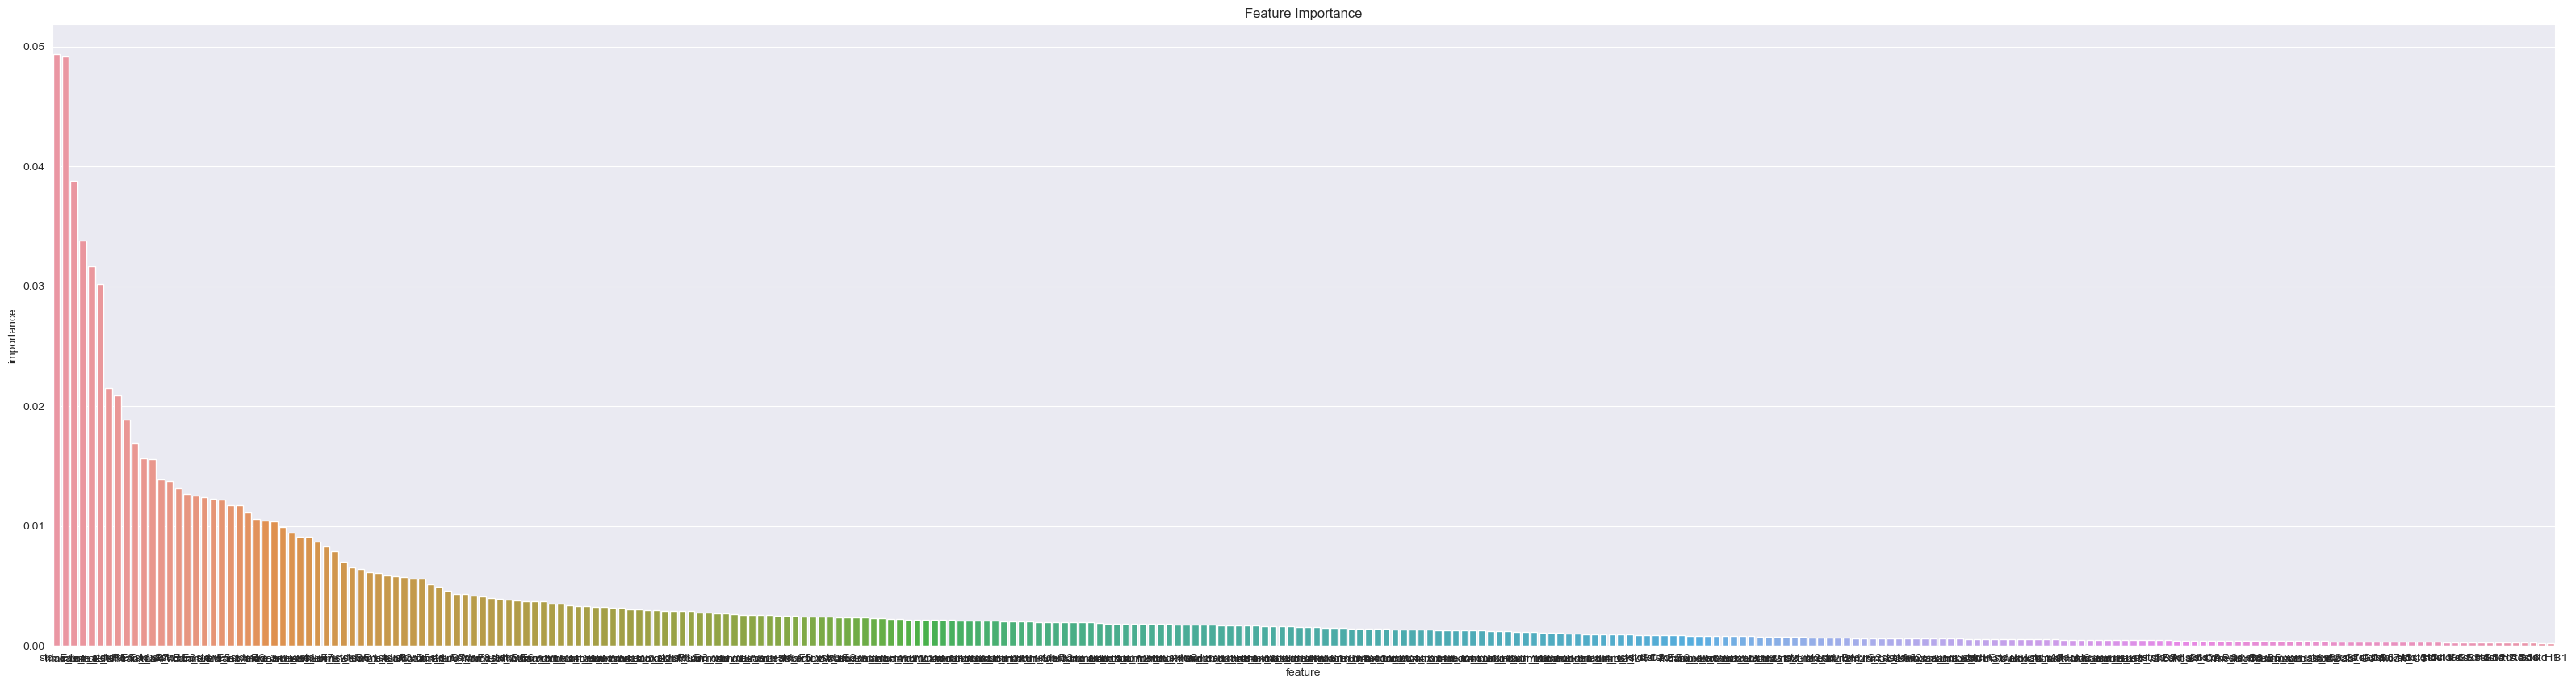

In [23]:
# Plot feature importance graph
plt.figure(figsize=(40,10))
plt.title("Feature Importance")
sns.barplot(importance_df.head(288), x='feature', y='importance') 

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

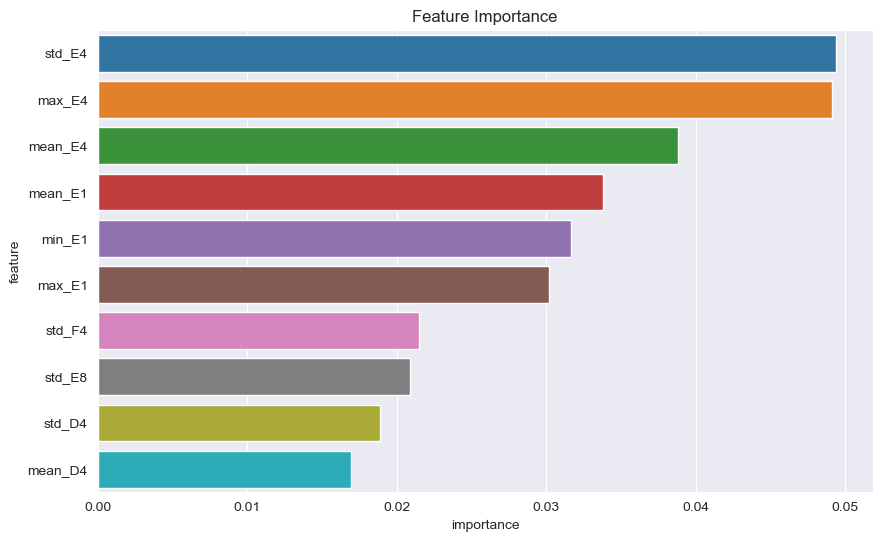

In [24]:
# Plot feature importance graph for head(10)
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
sns.barplot(importance_df.head(10), y='feature', x='importance') 

## Making Predictions

In [25]:
# Making predictions for train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [26]:
y_train_pred

array([8, 8, 4, ..., 2, 0, 9])

In [27]:
y_test_pred

array([ 7,  4,  5, ..., 10,  2,  6])

## Model Evaluation 

### Confusion matrix and Heatmap for Train and test set

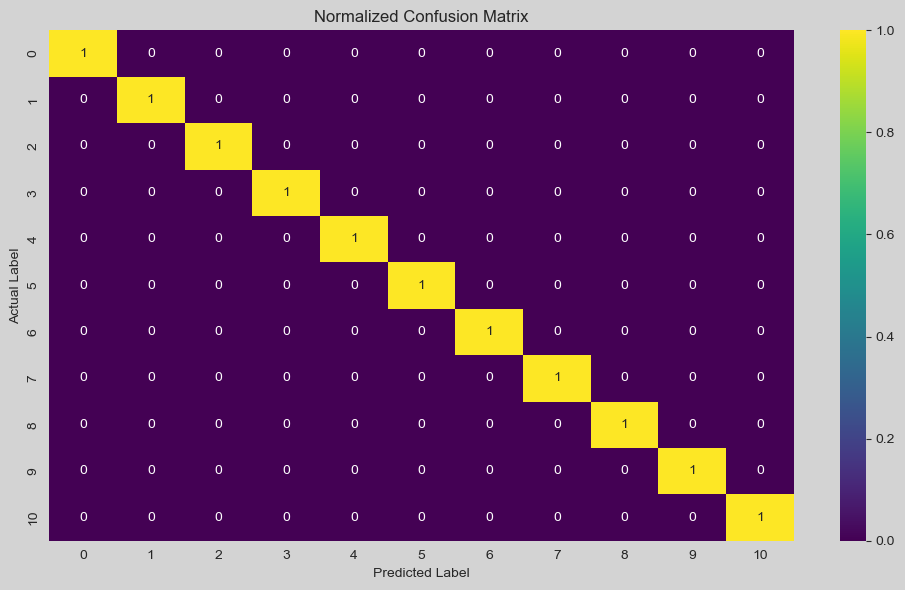

Train Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1441
           1       1.00      1.00      1.00      1435
           2       1.00      1.00      1.00      1450
           3       1.00      1.00      1.00      1445
           4       1.00      1.00      1.00      1182
           5       1.00      1.00      1.00       364
           6       1.00      1.00      1.00      1216
           7       1.00      1.00      1.00      1425
           8       1.00      1.00      1.00      1460
           9       1.00      1.00      1.00      1438
          10       1.00      1.00      1.00      1480

    accuracy                           1.00     14336
   macro avg       1.00      1.00      1.00     14336
weighted avg       1.00      1.00      1.00     14336



In [28]:
# Plot the confusion matrix for Training set
train_cf = confusion_matrix(y_train, y_train_pred, normalize='true')
plt.figure(figsize=(10, 6), facecolor='lightgrey')

# Heatmap
sns.heatmap(train_cf, annot=True, cmap='viridis')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

# Calculate Training Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
train_class_rep = classification_report(y_train, y_train_pred)

print(f"Train Accuracy: {train_acc*100} %")
print(train_class_rep)

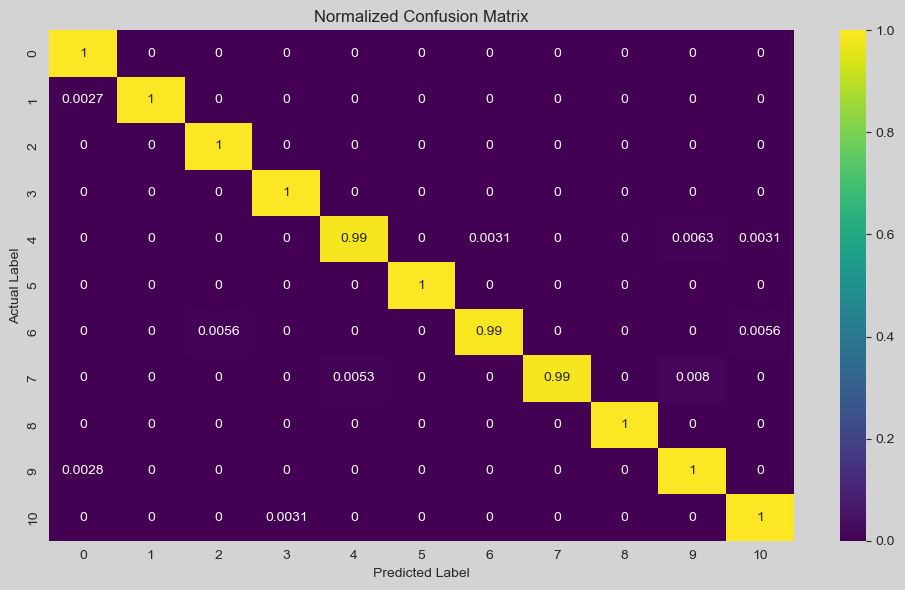

Test Accuracy: 99.55369595536959 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       359
           1       1.00      1.00      1.00       365
           2       0.99      1.00      1.00       350
           3       1.00      1.00      1.00       355
           4       0.99      0.99      0.99       318
           5       1.00      1.00      1.00        86
           6       1.00      0.99      0.99       355
           7       1.00      0.99      0.99       375
           8       1.00      1.00      1.00       340
           9       0.99      1.00      0.99       362
          10       0.99      1.00      0.99       320

    accuracy                           1.00      3585
   macro avg       1.00      1.00      1.00      3585
weighted avg       1.00      1.00      1.00      3585



In [29]:
# Plot the confusion matrix for Testing set
test_cf = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(10, 6), facecolor='lightgrey')

# Heatmap
sns.heatmap(test_cf, annot=True, cmap='viridis')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

# Calculate Training Accuracy
test_acc = accuracy_score(y_test, y_test_pred)
test_class_rep = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc*100} %")
print(test_class_rep)

In [30]:
# Inverse transform numerical labels back to string labels
y_test_actual = label.inverse_transform(y_test)
y_test_predicted = label.inverse_transform(y_test_pred)

# Create a new DataFrame for test data and predictions
test_df = pd.DataFrame({'Actual': y_test_actual, 
                        'Predicted': y_test_predicted})
test_df[test_df.Actual != test_df.Predicted]

,Actual,Predicted
391,CO_4000,Toluene_200
632,CO_4000,Ammonia_10000
641,Butanol_100,Toluene_200
653,CO_4000,Ammonia_10000
853,Ethylene_500,Butanol_100
864,Ethylene_500,Butanol_100
921,Butanol_100,Methanol_200
1041,Toluene_200,Benzene_200
1536,CO_4000,Toluene_200
1836,Ethylene_500,Methanol_200


In [31]:
test_df

,Actual,Predicted
0,Ethylene_500,Ethylene_500
1,Butanol_100,Butanol_100
2,CO_1000,CO_1000
3,Butanol_100,Butanol_100
4,Ethylene_500,Ethylene_500
...,...,...
3580,Toluene_200,Toluene_200
3581,CO_4000,CO_4000
3582,Toluene_200,Toluene_200
3583,Ammonia_10000,Ammonia_10000


In [32]:
test_df.to_csv('result.csv', index=None)

In [33]:
!head result.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
from IPython.display import FileLink
FileLink('result.csv')

C:\Users\HP\result.csv

## Conclusion

- **Random Forest Classifier**
  - **Training Accuracy**: 100%
  - **Testing Accuracy**: 99.55%
  - **Training Confusion Matrix**: The model perfectly predicted the training data with a normalized confusion matrix showing perfect classification for each chemical class.
  - **Testing Confusion Matrix**: The model also showed very high performance on the test set with a few misclassifications, as reflected in the normalized confusion matrix.

---

- **Feature Importance**
  - The top 10 most important features for the Random Forest Classifier were identified, providing insights into which attributes contributed most to the model's predictions.
  - Detailed feature importance was plotted for all features, highlighting the contribution of each feature in predicting the chemical names.

---

- **Model Performance**
  - The Random Forest Classifier demonstrates excellent performance in predicting chemical names, with an almost perfect training accuracy and very high testing accuracy.
  - Given these results, the Random Forest Classifier is an effective model for predicting the chemical names based on the features provided in the dataset.

### Key Findings

- **High Training Accuracy**: The model achieved a perfect training accuracy, indicating that it learned the patterns in the training data exceptionally well.
- **High Testing Accuracy**: With a **testing accuracy of 99.55%**, the model generalizes well to new, unseen data, making it reliable for practical applications.
- **Feature Importance**: The analysis of feature importance provides valuable insights into which features are most critical for predicting the chemical names, aiding in further refinement and understanding of the model.